In [1]:
# All imports should be in first cell
import cartopy
import imp
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
import numpy as np
import ThinWalls
import GMesh

In [2]:
imp.reload(ThinWalls);

In [3]:
# Colormap for plots
cmap = plt.cm.viridis
norm = matplotlib.colors.BoundaryNorm(np.linspace(0,1,9),cmap.N)

# 3x2 target grid with 6x4 topographic data containing a diagonal wall

Set cell means of fine (6x4 mesh) to source topography

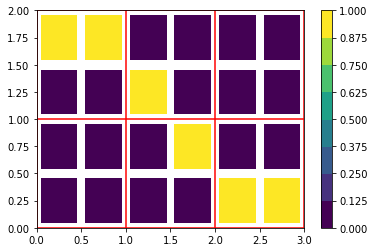

In [4]:
ni,nj = 3,2
FG = ThinWalls.ThinWalls(lon=np.linspace(0,ni,2*ni+1), lat=np.linspace(0,nj,2*nj+1))
FG.set_cell_mean(
    np.array(
[
    [0,0,0,0,1,1],
    [0,0,0,1,0,0],
    [0,0,1,0,0,0],
    [1,1,0,0,0,0]
]))

ax = plt.subplot(111)
plt.colorbar( FG.plot(ax, norm=norm, cmap=cmap), ax=ax);
GMesh.GMesh(lon=np.linspace(0,ni,ni+1), lat=np.linspace(0,nj,nj+1)).plot(ax,linecolor='r') # Will be target grid

Set thin wall edges based on step topography

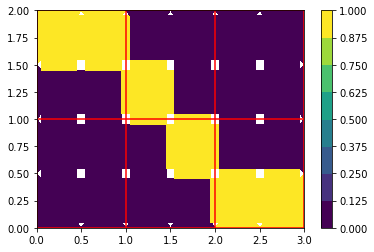

In [5]:
FG.set_edge_mean_to_step()

ax = plt.subplot(111)
plt.colorbar( FG.plot(ax, norm=norm, cmap=cmap), ax=ax);
GMesh.GMesh(lon=np.linspace(0,ni,ni+1), lat=np.linspace(0,nj,nj+1)).plot(ax,linecolor='r') # Will be target grid

Coarsen

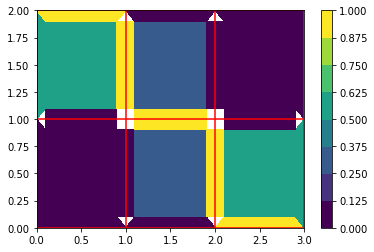

In [6]:
TG = FG.coarsen()

ax = plt.subplot(111)
plt.colorbar( TG.plot(ax, norm=norm, cmap=cmap), ax=ax);
GMesh.GMesh(lon=np.linspace(0,ni,ni+1), lat=np.linspace(0,nj,nj+1)).plot(ax,linecolor='r') # Will be target grid